In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/Image Retrieval'

/content/drive/MyDrive/Image Retrieval


In [3]:
def euclidean(a, b):
	# compute and return the euclidean distance between two vectors
	return np.linalg.norm(a - b)

def perform_search(query_features, indexed_train, max_results=5):
	retrieved = []
	for idx in range(0, len(indexed_train["features"])):
		distance = euclidean(query_features, indexed_train["features"][idx])
		retrieved.append((distance, idx))
	retrieved = sorted(retrieved)[:max_results]
	return retrieved

In [4]:
import copy
import numpy as np
import os
import matplotlib.pyplot as plt
import json
import cv2
import sklearn.metrics as metric
from core.AutoEncoder1 import ConvAutoEncoder
from tensorflow.keras.models import Model
import pandas as pd

In [5]:
base_dataset = "binary_scenario"
magnification = "400X"
class_dir = ['benign', 'malignant']
IMAGE_SIZE = (256, 256)
print("[INFO] indexing file images BreaKHis dataset...")
# indexing file images
dataset = []
for class_item in class_dir:
    cur_dir = os.path.join(base_dataset, 'test', magnification, class_item)
    for file in os.listdir(cur_dir):
        dataset.append(os.path.join(cur_dir, file))

[INFO] indexing file images BreaKHis dataset...


In [6]:
dataset_train = []
for class_item in class_dir:
    cur_dir = os.path.join(base_dataset, 'train', magnification, class_item)
    for file in os.listdir(cur_dir):
        dataset_train.append(os.path.join(cur_dir, file))


In [7]:
images_train = []
for image_path in dataset_train:
    if ".png" in image_path:
        image = cv2.imread(image_path)
        image = cv2.resize(image, IMAGE_SIZE)
        images_train.append(image)

In [8]:
print("[INFO] load images BreaKHis dataset...")
#  load images
images = []
for image_path in dataset:
    if ".png" in image_path:
        image = cv2.imread(image_path)
        image = cv2.resize(image, IMAGE_SIZE)
        images.append(image)

[INFO] load images BreaKHis dataset...


In [9]:
# normalization
print("[INFO] normalization...")
test_x = np.array(images).astype("float32") / 255.0

[INFO] normalization...


In [10]:
# 400X
auto_encoder_400= ConvAutoEncoder.build(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)
auto_encoder_400.load_weights("training_1_400/cp.ckpt")
with open('training_1_indexed_400.json') as f:
  training_indexed_400 = json.load(f)
encoder_400 = Model(inputs=auto_encoder_400.input,
	outputs=auto_encoder_400.get_layer("encoded").output)

In [11]:
# 200X
auto_encoder_200= ConvAutoEncoder.build(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)
auto_encoder_200.load_weights("training_1_200/cp.ckpt")
with open('training_1_indexed_200.json') as f:
  training_indexed_200 = json.load(f)
encoder_200 = Model(inputs=auto_encoder_200.input,
	outputs=auto_encoder_200.get_layer("encoded").output)

In [12]:
# 100X
auto_encoder_100 = ConvAutoEncoder.build(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)
auto_encoder_100.load_weights("training_1_100/cp.ckpt")
with open('training_1_indexed_100.json') as f:
  training_indexed_100 = json.load(f)
encoder_100 = Model(inputs=auto_encoder_100.input,
	outputs=auto_encoder_100.get_layer("encoded").output)

In [13]:
# 40X
auto_encoder_40 = ConvAutoEncoder.build(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)
auto_encoder_40.load_weights("training_1_40/cp.ckpt")
with open('training_1_indexed_40.json') as f:
  training_indexed_40 = json.load(f)
encoder_40 = Model(inputs=auto_encoder_40.input,
	outputs=auto_encoder_40.get_layer("encoded").output)

In [14]:
test_sample = test_x[10, :, : ,:].reshape(1, 256, 256, 3)
features_retrieved_400 = encoder_400.predict(test_sample)
features_retrieved_200 = encoder_200.predict(test_sample)
features_retrieved_100 = encoder_100.predict(test_sample)
features_retrieved_40 = encoder_40.predict(test_sample)

In [15]:
query_indexes = list(range(0, test_x.shape[0]))
label_builder = list(np.unique(training_indexed_400["labels"]))
class_builder = {label_unique:[] for label_unique in label_builder}

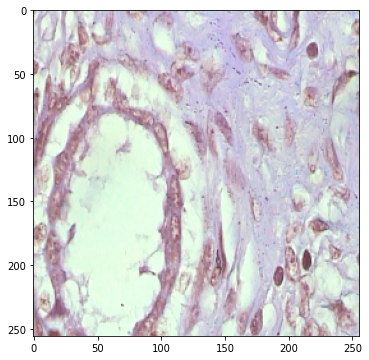

In [16]:
plt.figure(figsize=(6,6))
plt.imshow(test_x[10])
plt.show()

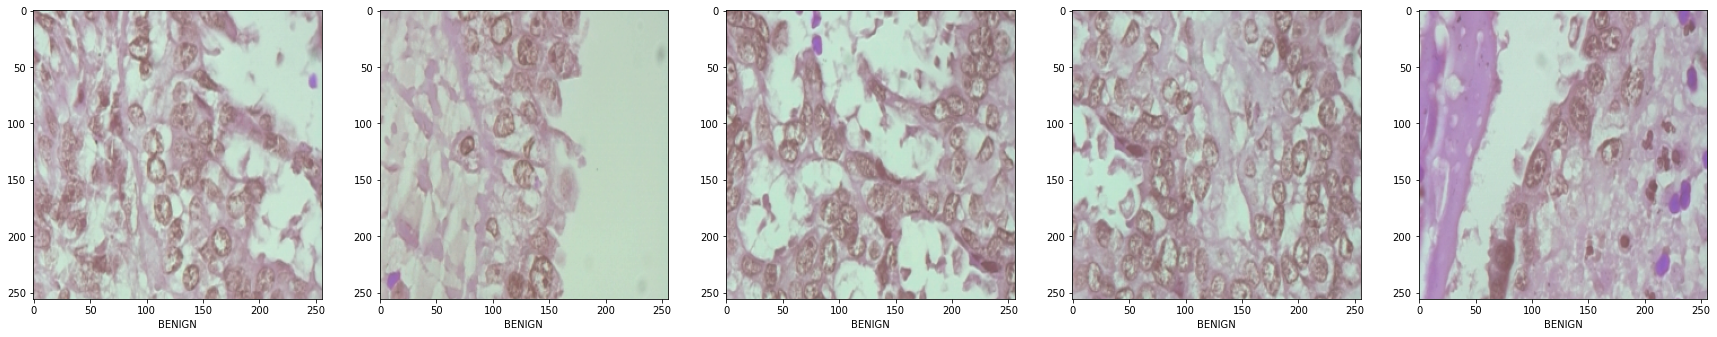

In [17]:
queryFeatures = features_retrieved_400[0]
results = perform_search(queryFeatures, training_indexed_400, max_results=5)
labels_ret = [training_indexed_400["labels"][r[1]] for r in results]

i = 0
f, axarr = plt.subplots(1, 5)
f.set_figheight(20)
f.set_figwidth(30)
for l in labels_ret:
  axarr[i].imshow(images_train[results[i][1]])
  axarr[i].set_xlabel(l.upper())
  i += 1
plt.show()

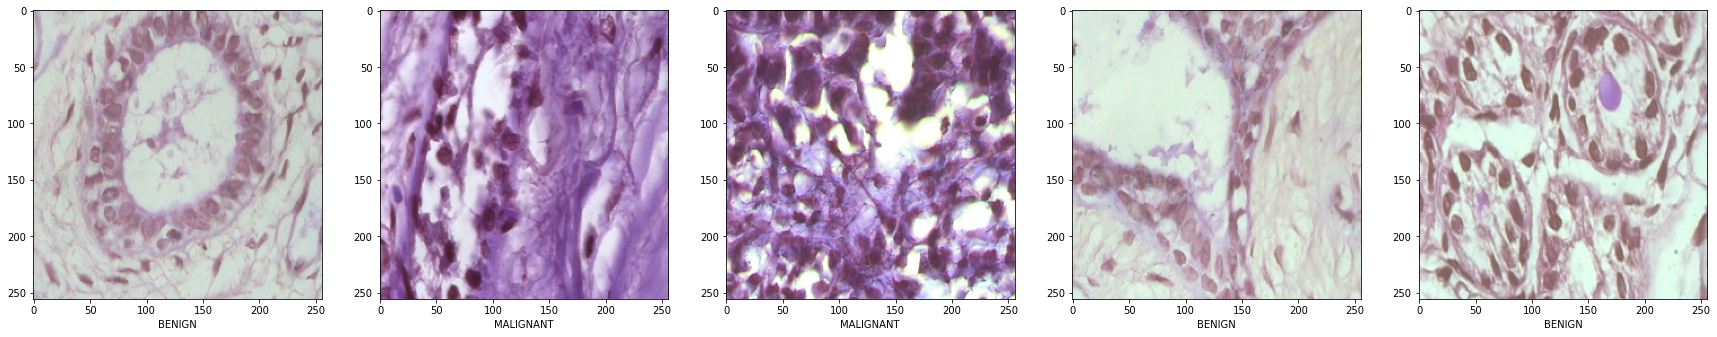

In [18]:
queryFeatures = features_retrieved_200[0]
results = perform_search(queryFeatures, training_indexed_200, max_results=5)
labels_ret = [training_indexed_200["labels"][r[1]] for r in results]

i = 0
f, axarr = plt.subplots(1, 5)
f.set_figheight(20)
f.set_figwidth(30)
for l in labels_ret:
  axarr[i].imshow(images_train[results[i][1]])
  axarr[i].set_xlabel(l.upper())
  i += 1
plt.show()

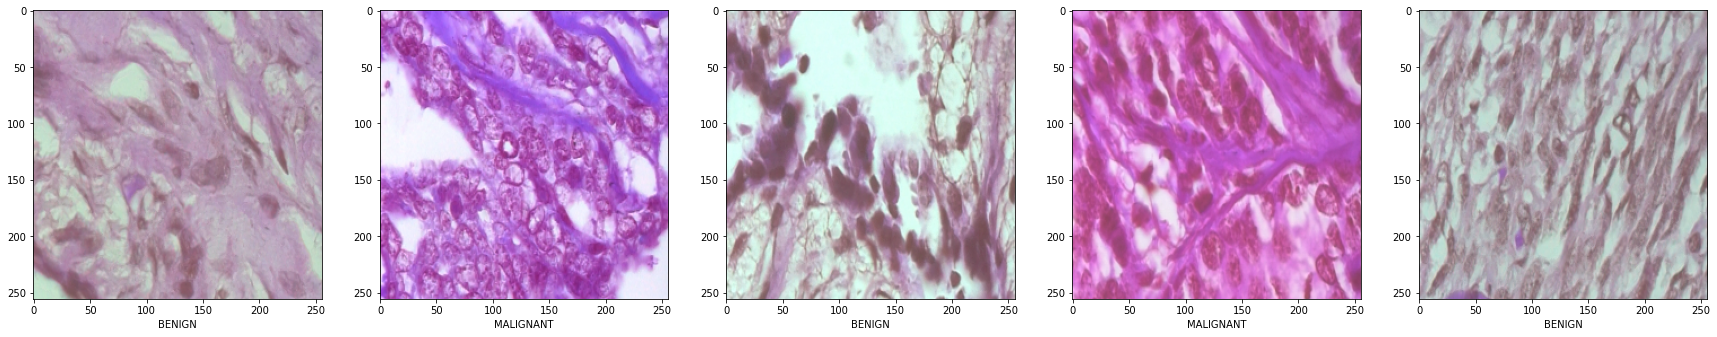

In [19]:
queryFeatures = features_retrieved_100[0]
results = perform_search(queryFeatures, training_indexed_100, max_results=5)
labels_ret = [training_indexed_100["labels"][r[1]] for r in results]

i = 0
f, axarr = plt.subplots(1, 5)
f.set_figheight(20)
f.set_figwidth(30)
for l in labels_ret:
  axarr[i].imshow(images_train[results[i][1]])
  axarr[i].set_xlabel(l.upper())
  i += 1
plt.show()

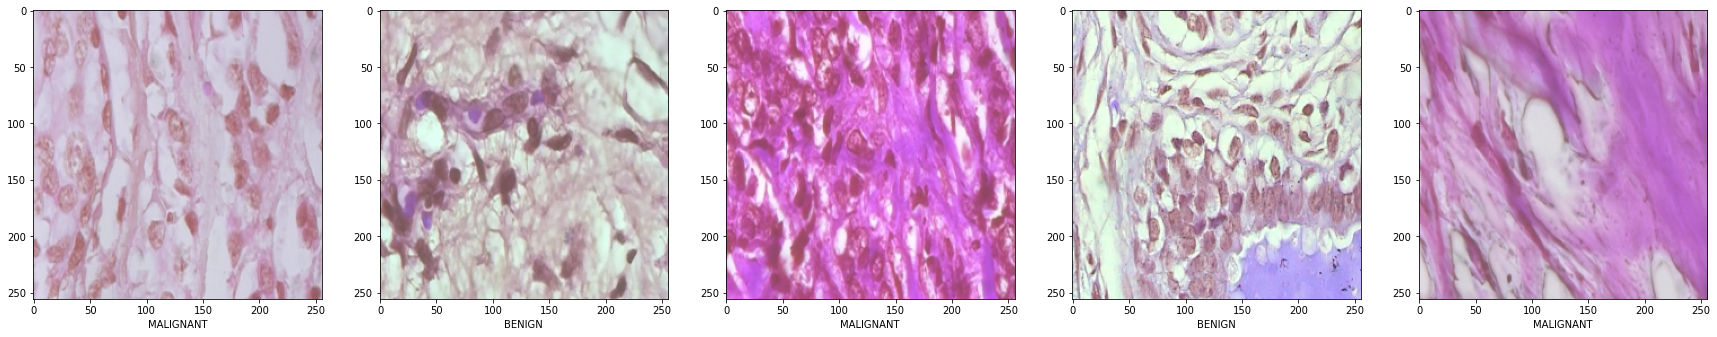

In [20]:
queryFeatures = features_retrieved_40[0]
results = perform_search(queryFeatures, training_indexed_40, max_results=5)
labels_ret = [training_indexed_40["labels"][r[1]] for r in results]

i = 0
f, axarr = plt.subplots(1, 5)
f.set_figheight(20)
f.set_figwidth(30)
for l in labels_ret:
  axarr[i].imshow(images_train[results[i][1]])
  axarr[i].set_xlabel(l.upper())
  i += 1
plt.show()